# 

# Enhancing Fraud Detection with ML!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
%matplotlib inline

In [2]:
data=pd.read_csv("D:/synthetic_financial_data.csv")

# Data Traversing

In [3]:
data.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [4]:
data.tail()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
9995,9996,1056,2023,8935.28,2023-01-01 02:46:35,1,MasterCard,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,2023-01-01 02:46:36,0,MasterCard,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,2023-01-01 02:46:37,0,American Express,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,2023-01-01 02:46:38,1,Visa,City-11,Retail,57,Purchase at Merchant-2019
9999,10000,1082,2070,7209.43,2023-01-01 02:46:39,1,Discover,City-1,Gas Station,50,Purchase at Merchant-2070


In [5]:
data

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,2023-01-01 02:46:35,1,MasterCard,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,2023-01-01 02:46:36,0,MasterCard,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,2023-01-01 02:46:37,0,American Express,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,2023-01-01 02:46:38,1,Visa,City-11,Retail,57,Purchase at Merchant-2019


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [7]:
data.describe()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


In [8]:
data.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'transaction_description'],
      dtype='object')

# data cleaning

In [9]:
data.isnull()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

# EDA(Exploratory data analyis)

C:\Users\91620\AppData\Local\Temp\ipykernel_50504\776479966.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="age_group", data=grouped_data, palette=colors)


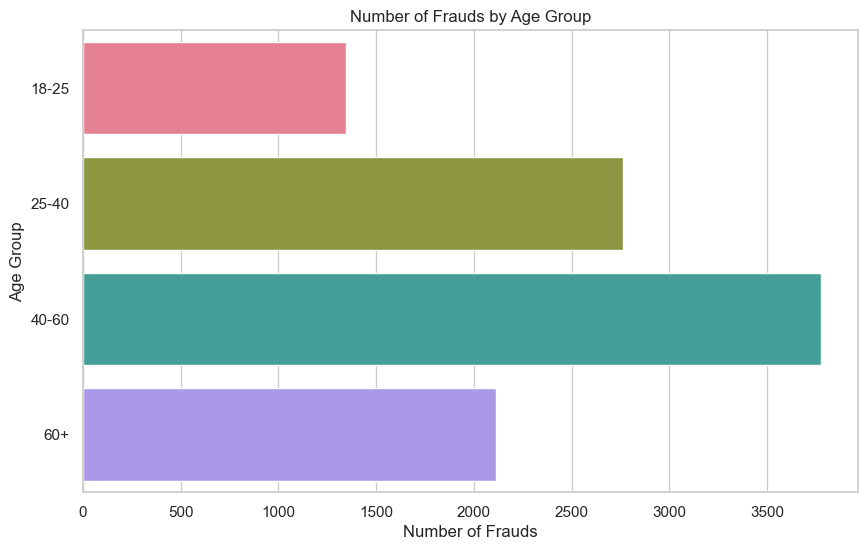

In [11]:
sns.set_theme(style="whitegrid")

# Define age ranges
age_bins = [18, 25, 40, 60, float('inf')]
age_labels = ['18-25', '25-40', '40-60', '60+']

# Categorize customer age into age groups
data['age_group'] = pd.cut(data['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group
grouped_data = data.groupby('age_group').size().reset_index(name='count')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Define custom color palette for each age group
colors = sns.color_palette("husl", len(age_labels))

# Plot the number of frauds against age groups (vertical bar plot)
sns.barplot(x="count", y="age_group", data=grouped_data, palette=colors)

# Add labels and title
plt.xlabel("Number of Frauds")
plt.ylabel("Age Group")
plt.title("Number of Frauds by Age Group")

plt.show()


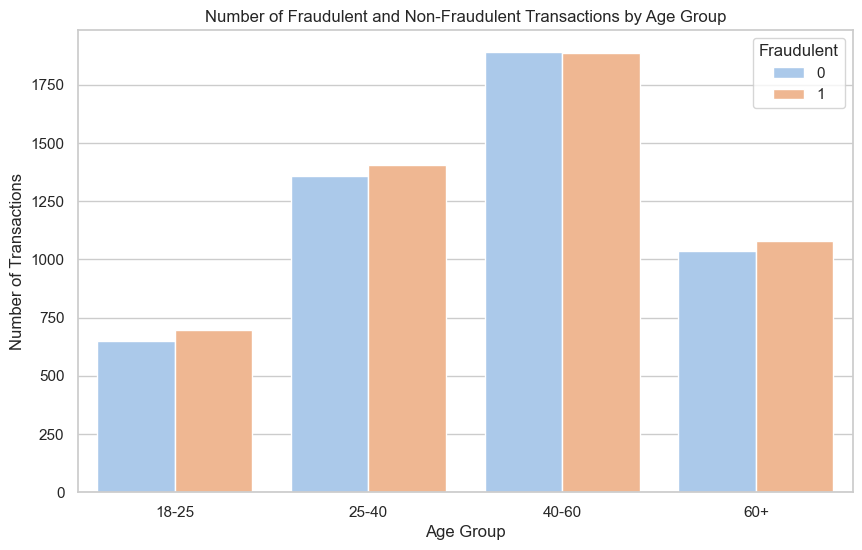

In [12]:
# Define age ranges
age_bins = [18, 25, 40, 60, float('inf')]
age_labels = ['18-25', '25-40', '40-60', '60+']

# Categorize customer age into age groups
data['age_group'] = pd.cut(data['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and is_fraudulent
grouped_data = data.groupby(['age_group', 'is_fraudulent']).size().reset_index(name='count')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Define custom color palette for each age group
colors = sns.color_palette("husl", len(age_labels))

# Plot the number of fraudulent and non-fraudulent transactions against age groups (grouped bar plot)
sns.barplot(x="age_group", y="count", hue="is_fraudulent", data=grouped_data, palette="pastel")

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Transactions")
plt.title("Number of Fraudulent and Non-Fraudulent Transactions by Age Group")

plt.legend(title="Fraudulent", loc="upper right")
plt.show()

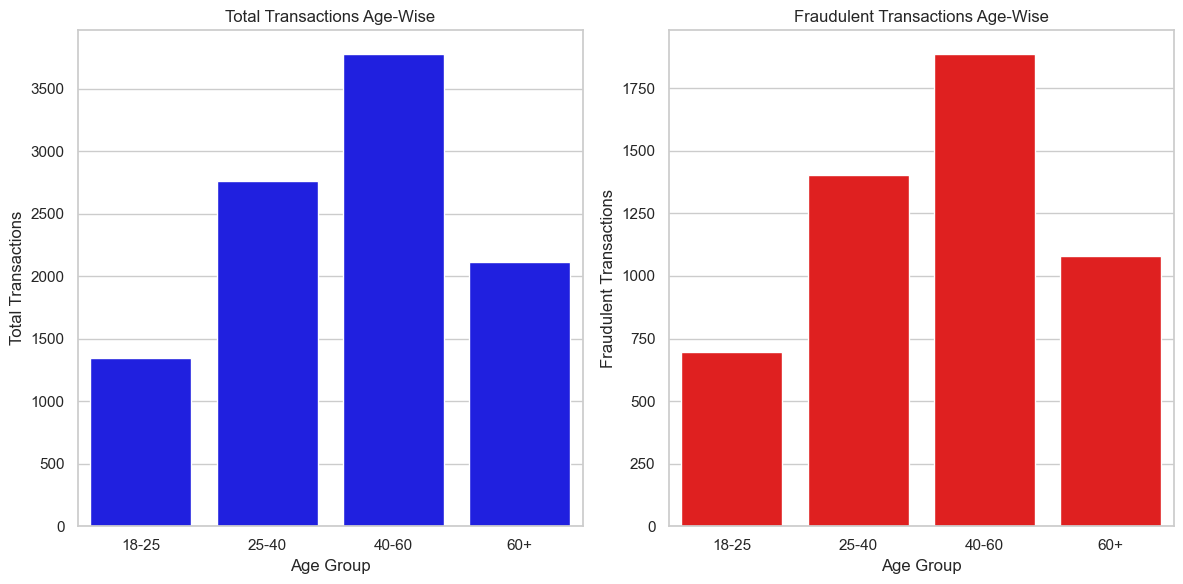

In [13]:
# Define age ranges
age_bins = [18, 25, 40, 60, float('inf')]
age_labels = ['18-25', '25-40', '40-60', '60+']

# Categorize customer age into age groups
data['age_group'] = pd.cut(data['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group
grouped_data_total = data.groupby('age_group').size().reset_index(name='total_count')
grouped_data_fraud = data[data['is_fraudulent'] == 1].groupby('age_group').size().reset_index(name='fraudulent_count')

# Merge the total and fraudulent counts
merged_data = pd.merge(grouped_data_total, grouped_data_fraud, on='age_group', how='left')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot total transactions
plt.subplot(1, 2, 1)
sns.barplot(x="age_group", y="total_count", data=merged_data, color="blue")
plt.xlabel("Age Group")
plt.ylabel("Total Transactions")
plt.title("Total Transactions Age-Wise")

# Plot fraudulent transactions
plt.subplot(1, 2, 2)
sns.barplot(x="age_group", y="fraudulent_count", data=merged_data, color="red")
plt.xlabel("Age Group")
plt.ylabel("Fraudulent Transactions")
plt.title("Fraudulent Transactions Age-Wise")

plt.tight_layout()
plt.show()

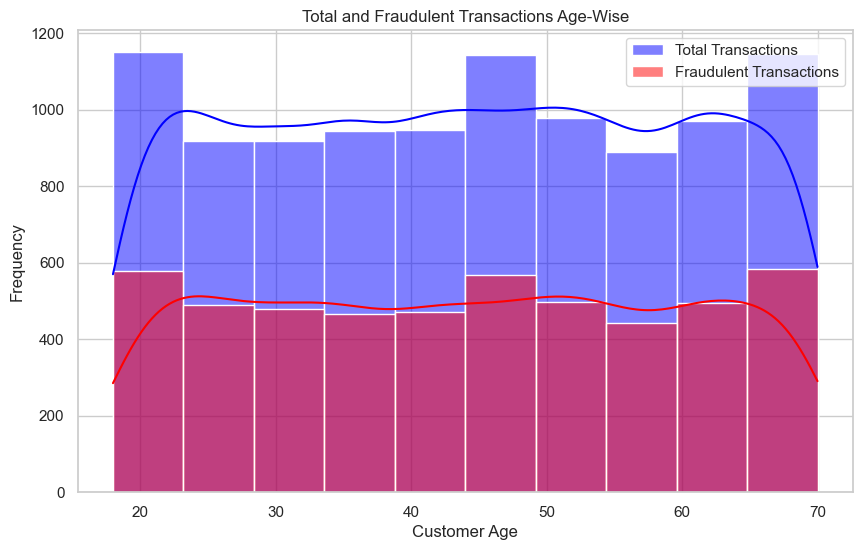

In [14]:
# Define age ranges
age_bins = [18, 25, 40, 60, float('inf')]
age_labels = ['18-25', '25-40', '40-60', '60+']

# Categorize customer age into age groups
data['age_group'] = pd.cut(data['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group
grouped_data_total = data.groupby('age_group').size().reset_index(name='total_count')
grouped_data_fraud = data[data['is_fraudulent'] == 1].groupby('age_group').size().reset_index(name='fraudulent_count')

# Merge the total and fraudulent counts
merged_data = pd.merge(grouped_data_total, grouped_data_fraud, on='age_group', how='left').fillna(0)

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot total transactions
sns.histplot(x="customer_age", data=data, bins=10, kde=True, color="blue", label="Total Transactions", alpha=0.5)

# Plot fraudulent transactions on top of total transactions
sns.histplot(x="customer_age", data=data[data['is_fraudulent'] == 1], bins=10, kde=True, color="red", label="Fraudulent Transactions", alpha=0.5)

# Add labels and title
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.title("Total and Fraudulent Transactions Age-Wise")

plt.legend()
plt.show()

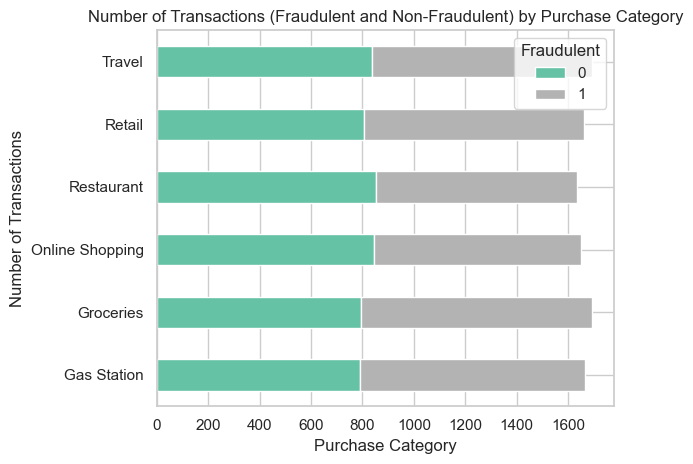

In [15]:
# Calculate number of transactions (fraudulent and non-fraudulent) for each category
category_counts = data.groupby("purchase_category")["is_fraudulent"].value_counts().unstack(fill_value=0)
 
# Create a stacked bar chart
category_counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.xlabel("Purchase Category")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions (Fraudulent and Non-Fraudulent) by Purchase Category")
plt.legend(title="Fraudulent")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Category with the highest percentage of fraud: Groceries (52.96%)


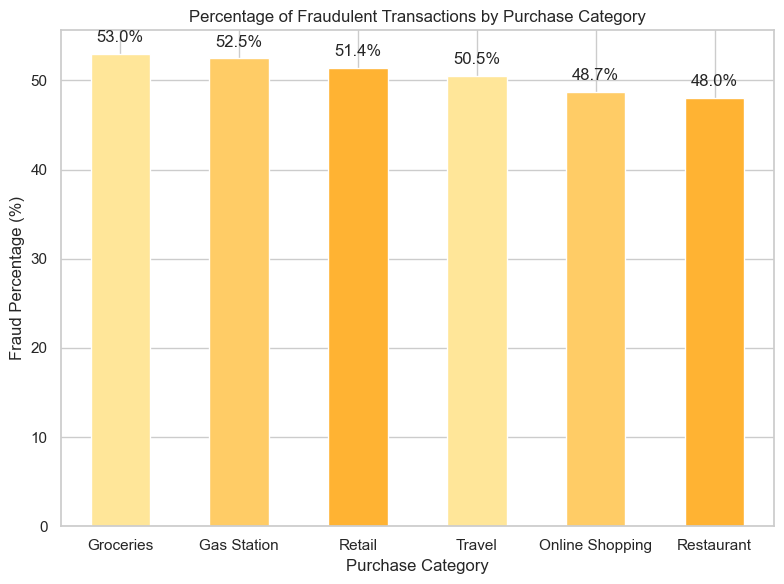

In [16]:

# Calculate total transactions and fraudulent transactions for each category
category_totals = data.groupby("purchase_category")["is_fraudulent"].count()
category_fraud = data[data["is_fraudulent"] == 1].groupby("purchase_category")["is_fraudulent"].count()

# Calculate fraud percentage for each category
fraud_percentages = (category_fraud / category_totals) * 100

# Sort categories by fraud percentage (descending)
fraud_percentages_sorted = fraud_percentages.sort_values(ascending=False)

# Extract the highest fraud category and its percentage
highest_fraud_category = fraud_percentages_sorted.idxmax()
highest_fraud_percentage = fraud_percentages_sorted.max()

# Create a bar chart with percentages on top
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
honey_colors = ["#ffe699", "#ffcc66", "#ffb333"]  # Honey color palette
bars = fraud_percentages_sorted.plot(kind="bar", color=honey_colors)

# Add percentage labels above bars
for bar, percentage in zip(bars.containers[0], fraud_percentages_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, percentage + 1, f"{percentage:.1f}%", ha="center", va="bottom")  # Adjust label position

plt.xlabel("Purchase Category")
plt.ylabel("Fraud Percentage (%)")
plt.title("Percentage of Fraudulent Transactions by Purchase Category")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Print the highest fraud category and its percentage
print(f"Category with the highest percentage of fraud: {highest_fraud_category} ({highest_fraud_percentage:.2f}%)")

plt.show()



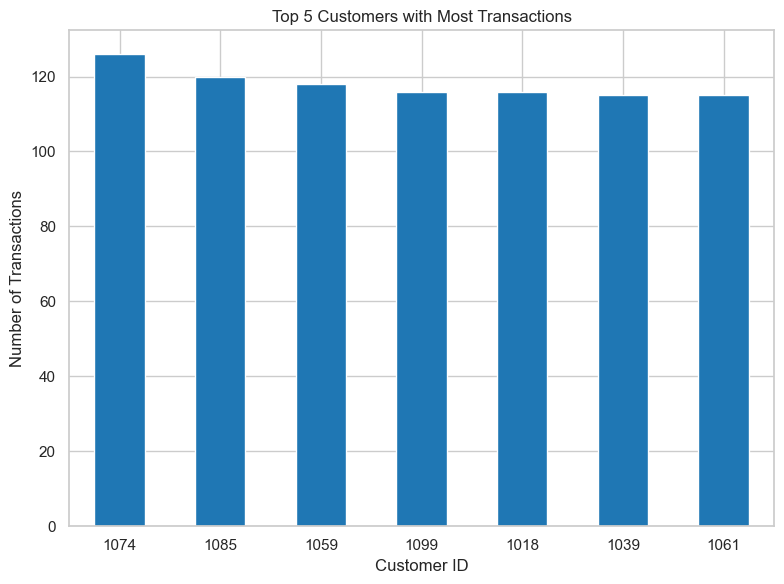

In [17]:
# Calculate transaction count for each customer
customer_transactions = data.groupby("customer_id")["customer_id"].count()

# Sort by transaction count (descending) and select top 5
top_5_customers = customer_transactions.sort_values(ascending=False).head(7)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
top_5_customers.plot(kind="bar", colormap="tab20")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.title("Top 5 Customers with Most Transactions")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


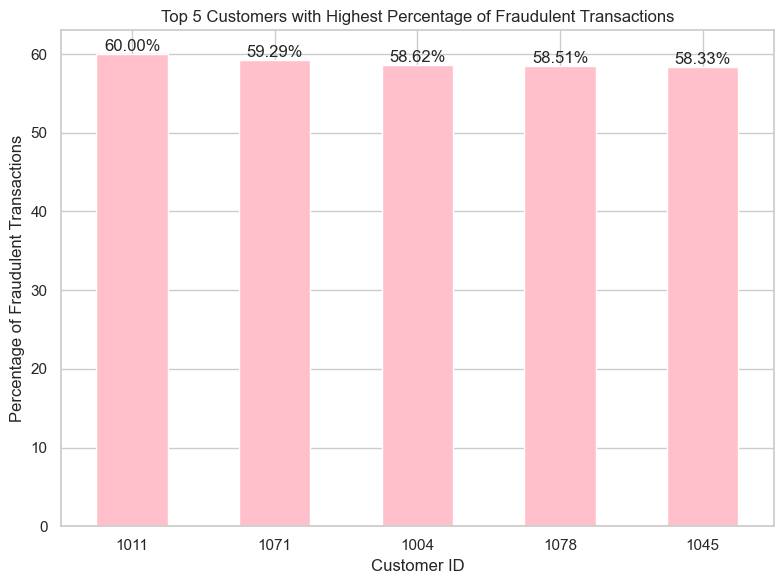

In [18]:

# Group data by customer_id and calculate the total number of transactions and fraudulent transactions
customer_transactions = data.groupby("customer_id")["is_fraudulent"].agg(total_transactions='count', fraudulent_transactions='sum')

# Calculate the percentage of fraudulent transactions for each customer
customer_transactions['fraud_percentage'] = (customer_transactions['fraudulent_transactions'] / customer_transactions['total_transactions']) * 100

# Sort by fraud percentage (descending) and select top 5
top_5_fraudulent_customers = customer_transactions.sort_values(by='fraud_percentage', ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bars = top_5_fraudulent_customers['fraud_percentage'].plot(kind="bar", color='pink')
plt.xlabel("Customer ID")
plt.ylabel("Percentage of Fraudulent Transactions")
plt.title("Top 5 Customers with Highest Percentage of Fraudulent Transactions")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add percentages on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

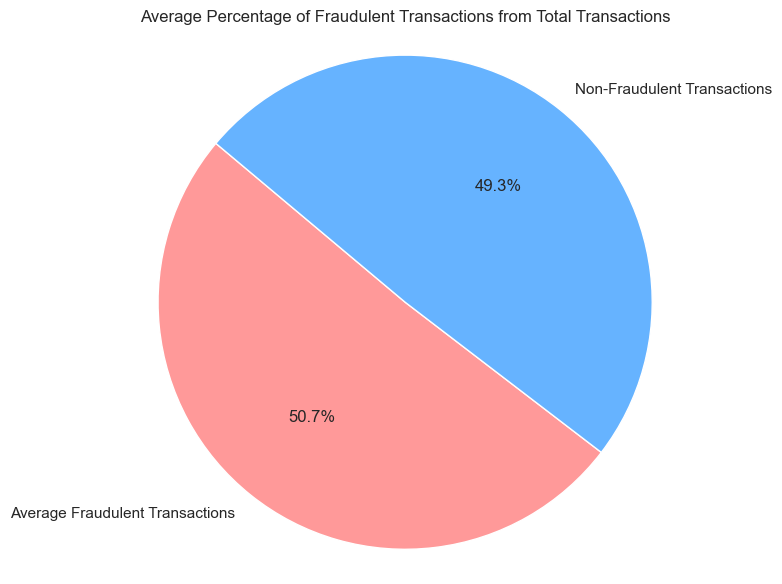

In [19]:
# Group data by customer_id and calculate the total number of transactions and fraudulent transactions
customer_transactions = data.groupby("customer_id")["is_fraudulent"].agg(total_transactions='count', fraudulent_transactions='sum')

# Calculate the percentage of fraudulent transactions for each customer
customer_transactions['fraud_percentage'] = (customer_transactions['fraudulent_transactions'] / customer_transactions['total_transactions']) * 100

# Calculate the average percentage of fraudulent transactions across all customers
average_fraud_percentage = customer_transactions['fraud_percentage'].mean()

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
labels = ['Average Fraudulent Transactions', 'Non-Fraudulent Transactions']
sizes = [average_fraud_percentage, 100 - average_fraud_percentage]
colors = ['#ff9999', '#66b3ff']  # Red for fraudulent transactions, blue for non-fraudulent transactions
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Average Percentage of Fraudulent Transactions from Total Transactions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

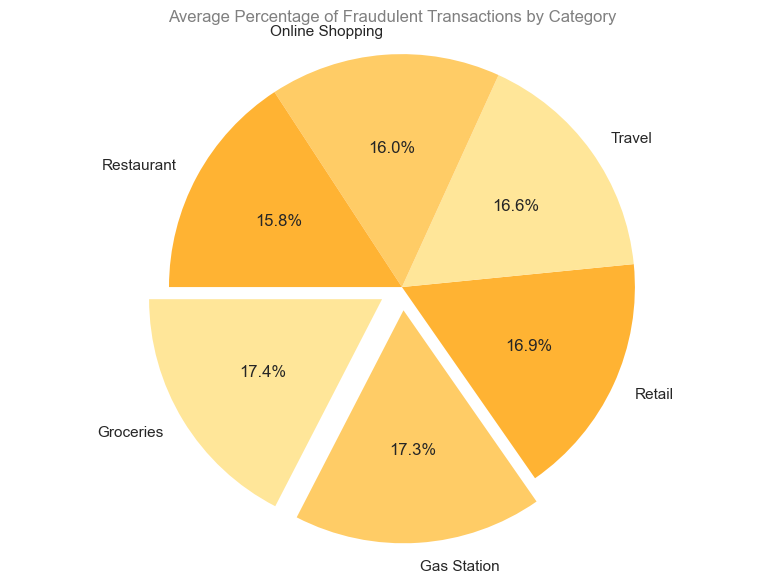

In [20]:
# Group data by 'purchase_category' and calculate the total number of transactions and fraudulent transactions for each category
category_transactions = data.groupby("purchase_category")["is_fraudulent"].agg(total_transactions='count', fraudulent_transactions='sum')

# Calculate the percentage of fraudulent transactions for each category
category_transactions['fraud_percentage'] = (category_transactions['fraudulent_transactions'] / category_transactions['total_transactions']) * 100

# Calculate the average percentage of fraudulent transactions across all categories
average_fraud_percentage = category_transactions['fraud_percentage'].mean()

# Sort categories by fraudulent percentage in descending order
category_transactions.sort_values(by='fraud_percentage', ascending=False, inplace=True)

# Prepare explode array for top two categories
explode = [0.1, 0.1] + [0] * (len(category_transactions) - 2)
honey_colors = ["#ffe699", "#ffcc66", "#ffb333"]  # Honey color palette

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
labels = category_transactions.index
sizes = category_transactions['fraud_percentage']
colors = plt.cm.tab20.colors  # Use default colormap for distinct colors

# Plot the pie chart with explode and without black boundaries
wedgeprops = {'linewidth': 0}  # Remove black boundaries
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=explode, startangle=180, wedgeprops=wedgeprops,colors=honey_colors)
plt.title("Average Percentage of Fraudulent Transactions by Category",color='grey')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


Total Amount of Transactions: 49583816.17
Total Amount of Fraudulent Transactions: 25203808.43


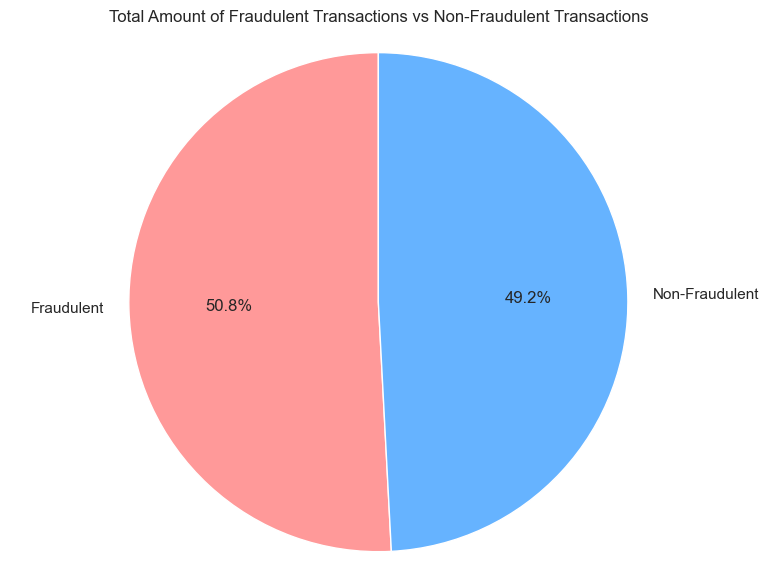

In [21]:
# Calculate the total amount of all transactions
total_amount = data['amount'].sum()

# Calculate the total amount for fraudulent transactions
total_fraudulent_amount = data[data['is_fraudulent'] == 1]['amount'].sum()

# Calculate the total amount for non-fraudulent transactions
total_non_fraudulent_amount = data[data['is_fraudulent'] == 0]['amount'].sum()
# Print the total amount of transactions and the total amount of fraudulent transactions
print("Total Amount of Transactions:", total_amount)
print("Total Amount of Fraudulent Transactions:", total_fraudulent_amount)
# Create a pie chart
plt.figure(figsize=(8, 6))

# Plot the pie chart for fraudulent and non-fraudulent amounts
plt.pie([total_fraudulent_amount, total_non_fraudulent_amount], labels=['Fraudulent', 'Non-Fraudulent'], autopct='%0.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
plt.title('Total Amount of Fraudulent Transactions vs Non-Fraudulent Transactions')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

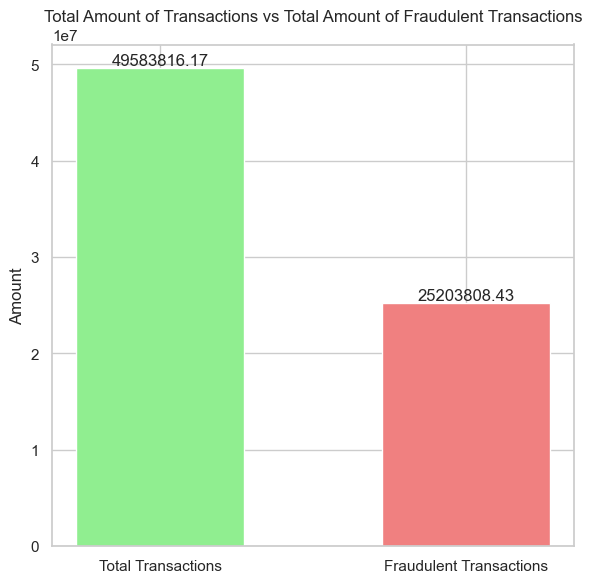

In [22]:
# Calculate the total amount of all transactions
total_amount = data['amount'].sum()

# Calculate the total amount for fraudulent transactions
total_fraudulent_amount = data[data['is_fraudulent'] == 1]['amount'].sum()

# Create a bar graph
plt.figure(figsize=(6, 6))

# Plot the total amount of transactions and total amount of fraudulent transactions with light orange and light green colors
bars = plt.bar(['Total Transactions', 'Fraudulent Transactions'], [total_amount, total_fraudulent_amount], color=['lightgreen', 'lightcoral'],width=0.55)

plt.ylabel('Amount')
plt.title('Total Amount of Transactions vs Total Amount of Fraudulent Transactions')

# Add the amount on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


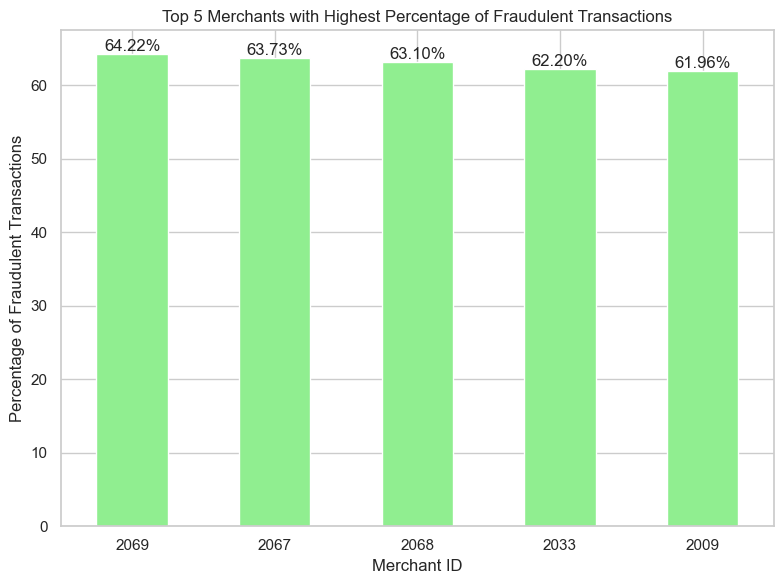

In [23]:
# Group data by merchant_id and calculate the total number of transactions and fraudulent transactions
merchant_transactions = data.groupby("merchant_id")["is_fraudulent"].agg(total_transactions='count', fraudulent_transactions='sum')

# Calculate the percentage of fraudulent transactions for each merchant
merchant_transactions['fraud_percentage'] = (merchant_transactions['fraudulent_transactions'] / merchant_transactions['total_transactions']) * 100

# Sort by fraud percentage (descending) and select top 5
top_5_fraudulent_merchants = merchant_transactions.sort_values(by='fraud_percentage', ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bars = top_5_fraudulent_merchants['fraud_percentage'].plot(kind="bar", color='lightgreen')
plt.xlabel("Merchant ID")
plt.ylabel("Percentage of Fraudulent Transactions")
plt.title("Top 5 Merchants with Highest Percentage of Fraudulent Transactions")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add percentages on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

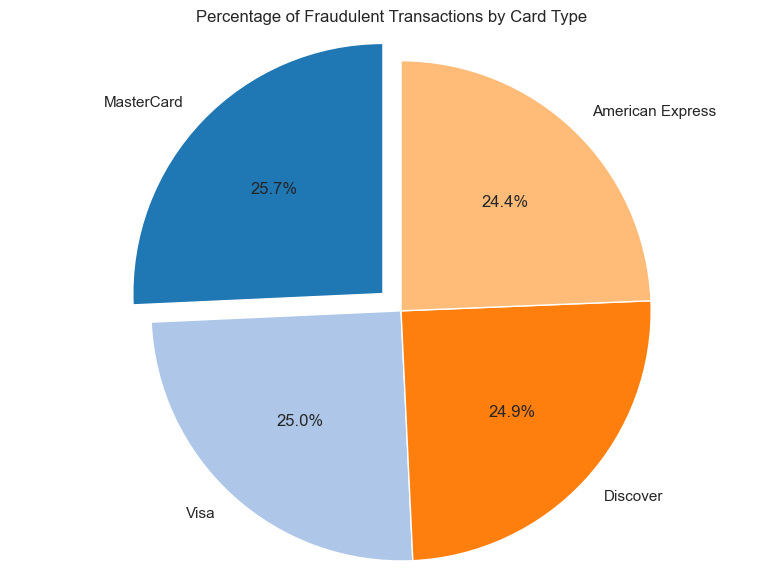

In [24]:
# Group data by 'card_type' and calculate the total number of transactions and fraudulent transactions for each card type
card_transactions = data.groupby("card_type")["is_fraudulent"].agg(total_transactions='count', fraudulent_transactions='sum')

# Calculate the percentage of fraudulent transactions for each card type
card_transactions['fraud_percentage'] = (card_transactions['fraudulent_transactions'] / card_transactions['total_transactions']) * 100

# Sort card types by the percentage of fraudulent transactions in descending order
card_transactions.sort_values(by='fraud_percentage', ascending=False, inplace=True)

# Explode the top card type
explode = [0.1 if i == card_transactions.index[0] else 0 for i in card_transactions.index]

# Create a pie chart
plt.figure(figsize=(8, 6))

# Plot the pie chart for card types based on the percentage of fraudulent transactions
plt.pie(card_transactions['fraud_percentage'], labels=card_transactions.index, autopct='%0.1f%%', colors=plt.cm.tab20.colors, explode=explode, startangle=90)
plt.title('Percentage of Fraudulent Transactions by Card Type')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

C:\Users\91620\AppData\Local\Temp\ipykernel_50504\2141637661.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Purples_r')(np.linspace(0.3, 0.8, num_bars))  # Reverse colormap to start from dark


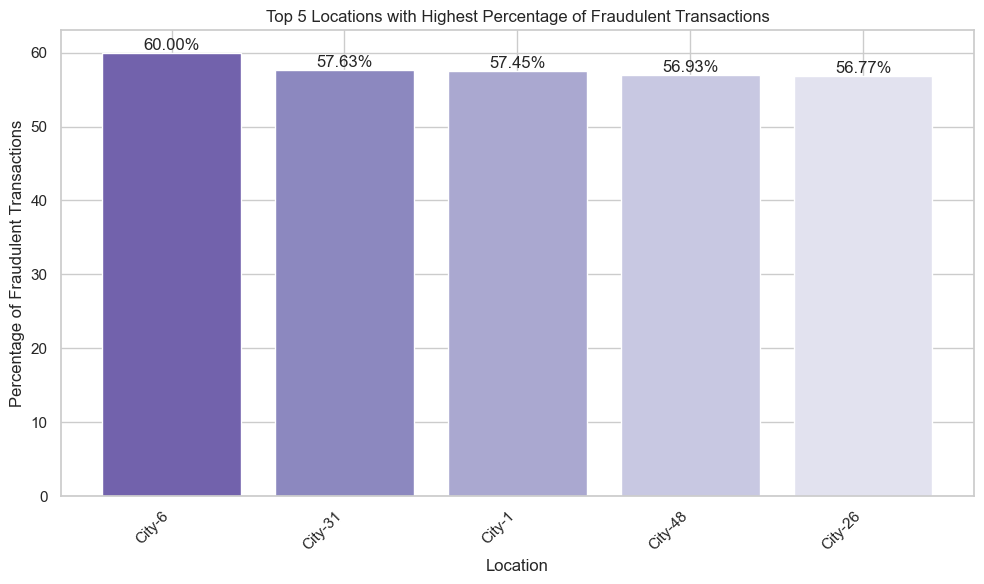

In [25]:
# Group data by 'location' and calculate the total number of transactions and fraudulent transactions for each location
location_transactions = data.groupby("location")["is_fraudulent"].agg(total_transactions='count', fraudulent_transactions='sum')

# Calculate the percentage of fraudulent transactions to total transactions for each location
location_transactions['fraud_percentage'] = (location_transactions['fraudulent_transactions'] / location_transactions['total_transactions']) * 100

# Sort locations by the percentage of fraudulent transactions in descending order
location_transactions.sort_values(by='fraud_percentage', ascending=False, inplace=True)

# Select the top five locations with the highest percentage of fraudulent transactions
top_5_fraudulent_locations = location_transactions.head(5)

# Define a color palette with shades of purple from dark to light
num_bars = len(top_5_fraudulent_locations)
colors = plt.cm.get_cmap('Purples_r')(np.linspace(0.3, 0.8, num_bars))  # Reverse colormap to start from dark

# Create a bar graph
plt.figure(figsize=(10, 6))

# Plot the top five fraudulent locations with shades of purple colors
bars = plt.bar(top_5_fraudulent_locations.index, top_5_fraudulent_locations['fraud_percentage'], color=colors)

plt.xlabel('Location')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.title('Top 5 Locations with Highest Percentage of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')

# Add the percentage on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



# ML(Machine learning) 

# Label encoder and data transformation

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#tranforming object to numeric value
data['purchase_category_n']=le.fit_transform(data['purchase_category'])
data['card_type_n']=le.fit_transform(data['card_type'])
data['location_n']=le.fit_transform(data['location'])

In [27]:
#deleting pre-columns
data=data.drop(['purchase_category'],axis='columns')
data=data.drop(['card_type'],axis='columns')
data=data.drop(['transaction_time'],axis='columns')
data=data.drop(['location'],axis='columns')
data=data.drop(['transaction_description'],axis='columns')

In [28]:
data

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age,age_group,purchase_category_n,card_type_n,location_n
0,1,1082,2027,5758.59,0,43,40-60,0,2,23
1,2,1015,2053,1901.56,1,61,60+,2,3,41
2,3,1004,2035,1248.86,1,57,40-60,0,2,46
3,4,1095,2037,7619.05,1,59,40-60,5,1,46
4,5,1036,2083,1890.10,1,36,25-40,4,2,27
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,1,36,25-40,3,2,32
9996,9997,1053,2026,30.15,0,42,40-60,4,2,25
9997,9998,1041,2034,6333.64,0,36,25-40,2,0,0
9998,9999,1009,2019,2837.13,1,57,40-60,4,3,2


In [29]:
data.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'is_fraudulent', 'customer_age', 'age_group', 'purchase_category_n',
       'card_type_n', 'location_n'],
      dtype='object')

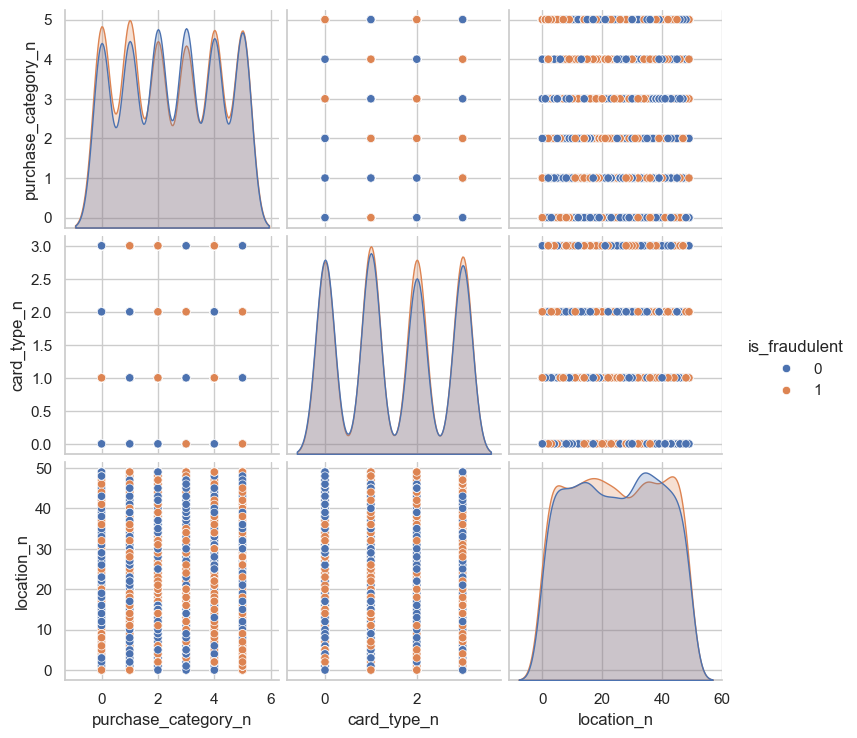

In [30]:
# Define the maximum number of unique values a column can have to be included in the pairplot
max_unique_values = 50

# Filter columns with fewer than the specified number of unique values
selected_columns = [col for col in data.columns if data[col].nunique() <= max_unique_values]

# Ensure that 'is_fraudulent' is included in the pairplot if it's not already in selected_columns
if 'is_fraudulent' not in selected_columns:
    selected_columns.append('is_fraudulent')

# Create a pairplot
sns.pairplot(data[selected_columns], hue='is_fraudulent', diag_kind='kde')

# Show the plot
plt.show()


# linear regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
# Select relevant features and the target variable
features = ['customer_age','amount','card_type_n']
target = 'is_fraudulent'

m = data[features]
n = data[target]

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
model=sc.fit(m)

In [36]:
m= model.transform(m)

In [37]:
m

array([[-0.06837047,  0.2759763 ,  0.45955078],
       [ 1.10649206, -1.0542383 ,  1.35518668],
       [ 0.8454115 , -1.27934184,  0.45955078],
       ...,
       [-0.52526146,  0.47429986, -1.33172102],
       [ 0.8454115 , -0.73157841,  1.35518668],
       [ 0.38852051,  0.77634279, -0.43608512]])

In [38]:
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=42)

In [39]:
# Train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(m_train, n_train)

LinearRegression()

In [40]:
# Predict on the test data
n_pred = linear_reg_model.predict(m_test)
n_pred

array([0.5000935 , 0.50593736, 0.51256047, ..., 0.50965785, 0.50920135,
       0.50578381])

In [41]:
print('MAE:', metrics.mean_absolute_error(n_test, n_pred))
print('MSE:', metrics.mean_squared_error(n_test,n_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(n_test, n_pred)))

MAE: 0.499839781924134
MSE: 0.24988556796059558
RMSE: 0.4998855548629062


In [42]:
coefficients = pd.DataFrame(linear_reg_model.coef_, features, columns=['Coefficient'])
print(coefficients)

              Coefficient
customer_age    -0.003761
amount           0.003799
card_type_n      0.000862


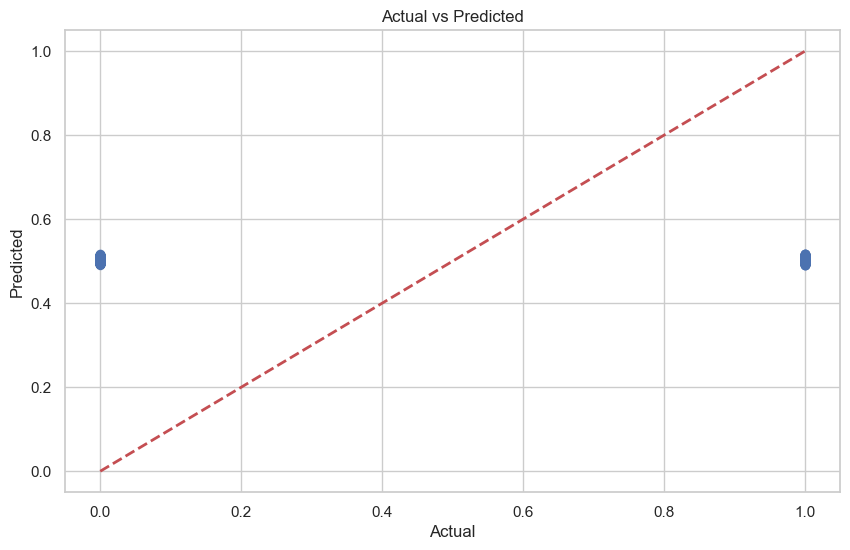

In [43]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(n_test, n_pred, alpha=0.5)
plt.plot([n.min(), n.max()], [n.min(), n.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

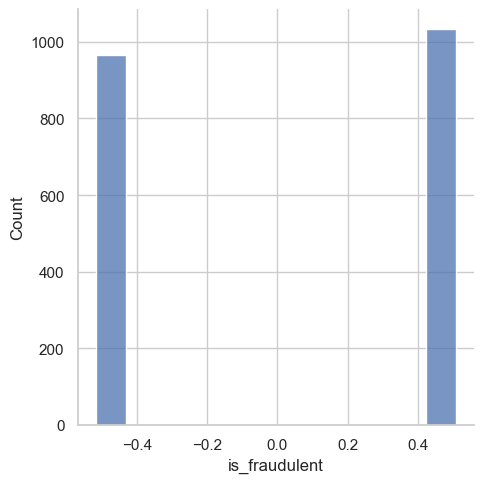

In [44]:
sns.displot(n_test-n_pred)

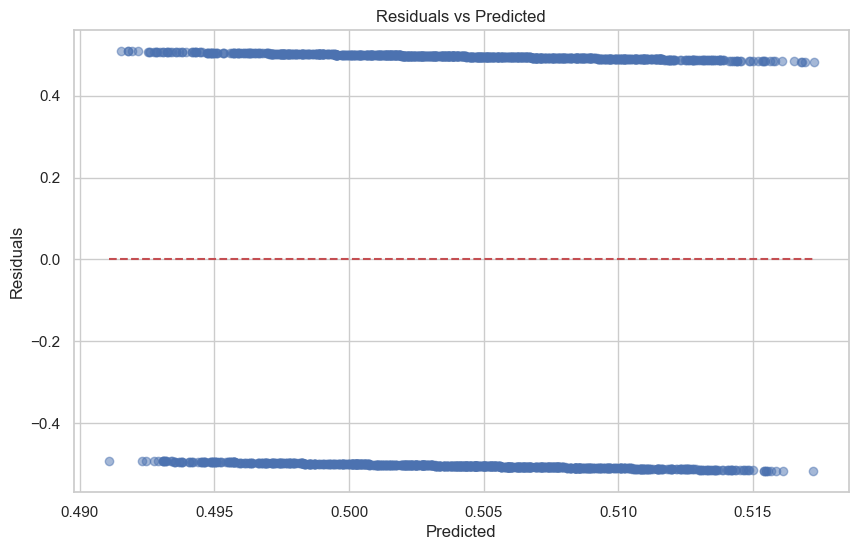

In [45]:
# Residual plot
residuals = n_test - n_pred

plt.figure(figsize=(10, 6))
plt.scatter(n_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=n_pred.min(), xmax=n_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


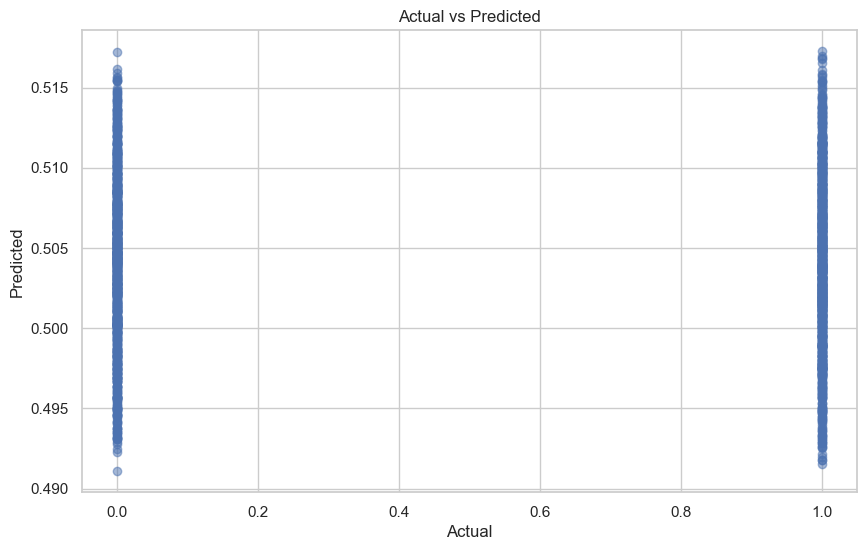

In [46]:
# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(n_test, n_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


# Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [48]:
# Splitting the data into features (a) and target variable (b)
features = ['amount', 'card_type_n', 'purchase_category_n', 'customer_age']
target = 'is_fraudulent'

a= data[features]
b = data[target]

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
model=sc.fit(a)
a= model.transform(a)
a

array([[ 0.2759763 ,  0.45955078, -1.45980773, -0.06837047],
       [-1.0542383 ,  1.35518668, -0.29270849,  1.10649206],
       [-1.27934184,  0.45955078, -1.45980773,  0.8454115 ],
       ...,
       [ 0.47429986, -1.33172102, -0.29270849, -0.52526146],
       [-0.73157841,  1.35518668,  0.87439075,  0.8454115 ],
       [ 0.77634279, -0.43608512, -1.45980773,  0.38852051]])

In [51]:
# Splitting the data into train and test sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [52]:
# Initializing and training the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(a_train, b_train)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
# Predicting on the test set
b_pred_prob = log_reg_model.predict_proba(a_test)[:, 1]

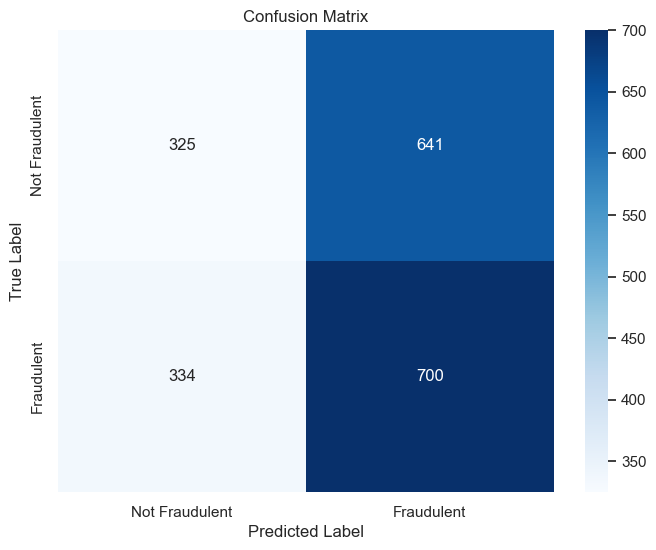

In [54]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
b_pred_class = log_reg_model.predict(a_test)

# Compute confusion matrix
cm = confusion_matrix(b_test, b_pred_class)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

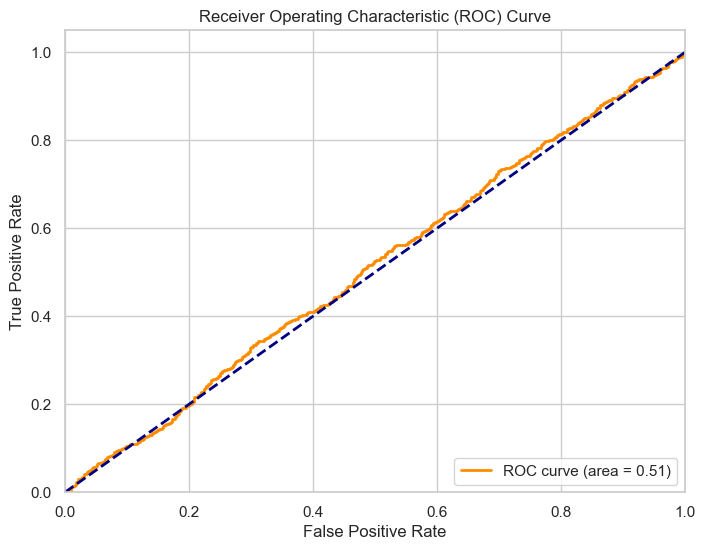

In [55]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(b_test, b_pred_prob)
roc_auc = roc_auc_score(b_test, b_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

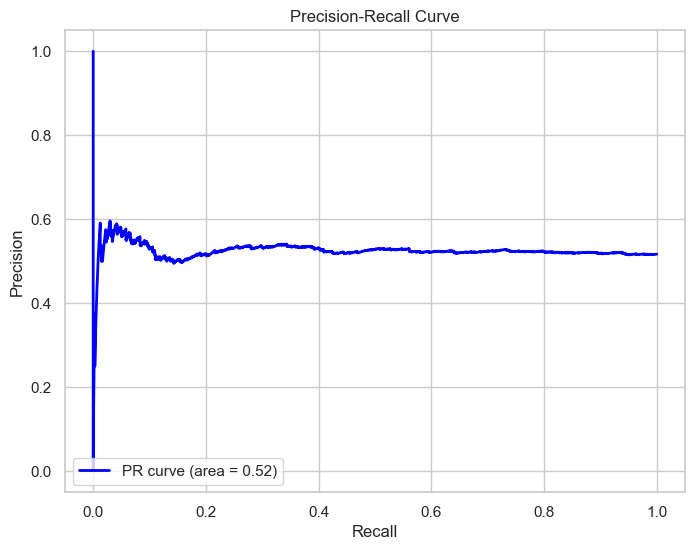

In [56]:
# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(b_test, b_pred_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [57]:
log_reg_model.score(a_test,b_test)

0.5125

In [58]:
#classification report
print(classification_report(b_test, b_pred_class))

              precision    recall  f1-score   support

           0       0.49      0.34      0.40       966
           1       0.52      0.68      0.59      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.51      0.51      0.50      2000



# Random forest classifier 

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   transaction_id       10000 non-null  int64   
 1   customer_id          10000 non-null  int64   
 2   merchant_id          10000 non-null  int64   
 3   amount               10000 non-null  float64 
 4   is_fraudulent        10000 non-null  int64   
 5   customer_age         10000 non-null  int64   
 6   age_group            10000 non-null  category
 7   purchase_category_n  10000 non-null  int32   
 8   card_type_n          10000 non-null  int32   
 9   location_n           10000 non-null  int32   
dtypes: category(1), float64(1), int32(3), int64(5)
memory usage: 596.0 KB


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Select features and target
features = ['amount', 'customer_age', 'purchase_category_n', 'card_type_n', 'location_n']
target = 'is_fraudulent'
X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data using fitted scaler

# Train a RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_class = rf_model.predict(X_test_scaled)
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))


Accuracy: 0.507
ROC AUC Score: 0.513251819102883

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       966
           1       0.52      0.50      0.51      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



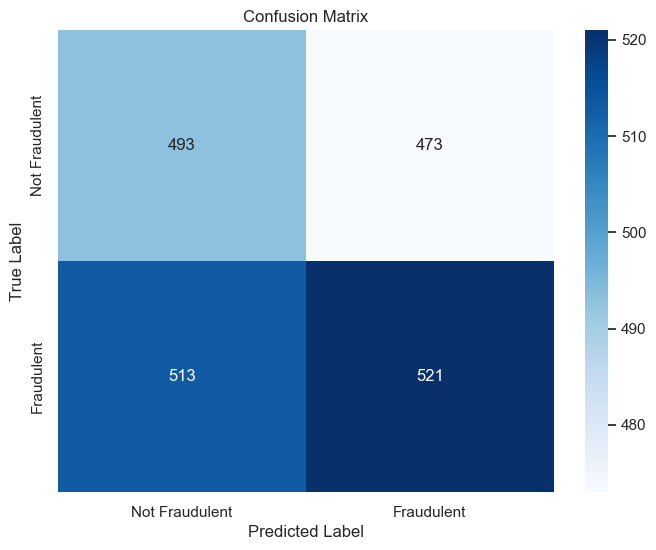

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


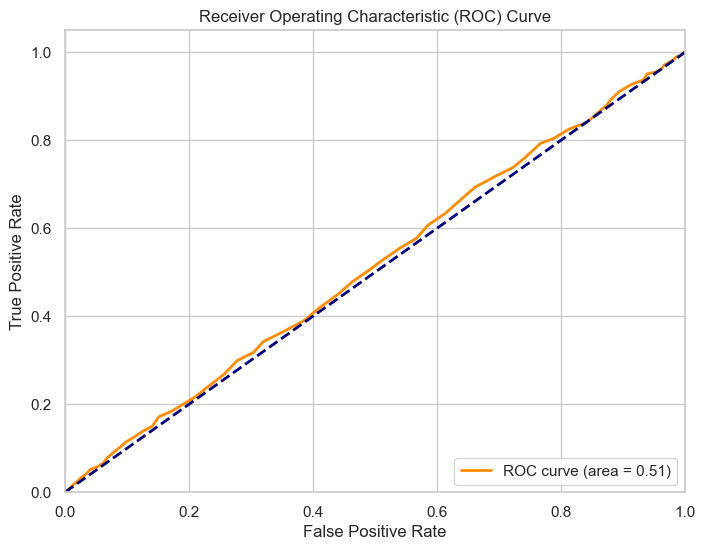

In [62]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


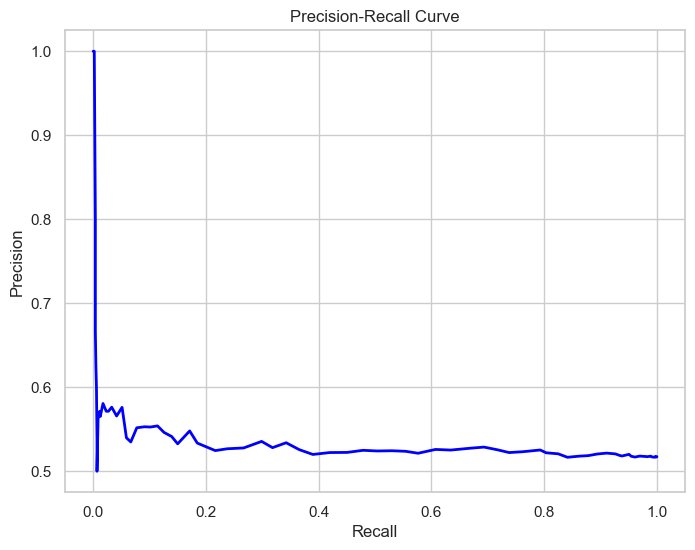

In [63]:
# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Feature ranking:
1. feature amount (0.3678679016757633)
2. feature location_n (0.2434838365460262)
3. feature customer_age (0.24064592960197456)
4. feature purchase_category_n (0.08270763385903619)
5. feature card_type_n (0.06529469831719972)


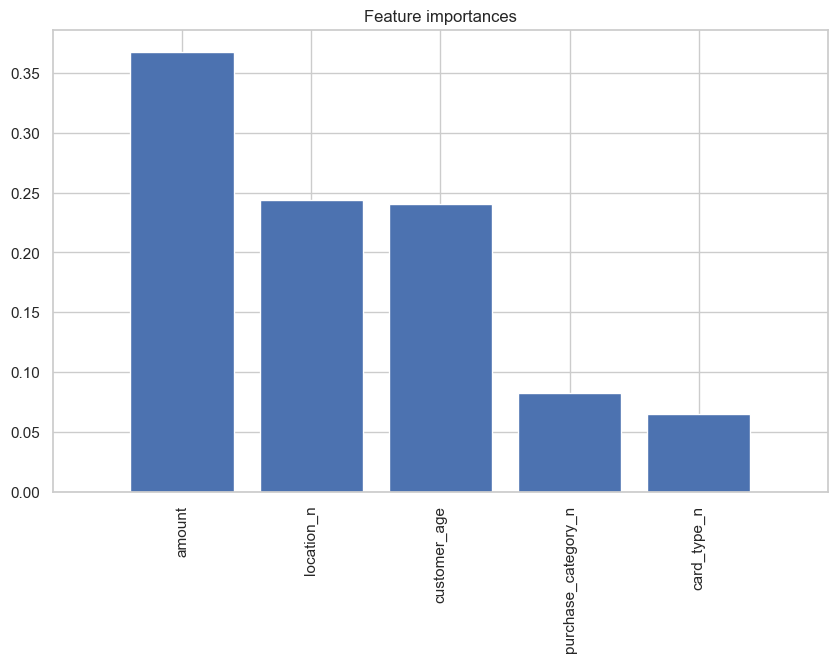

In [64]:
# Compute feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [65]:
score_linear = linear_reg_model.score(m_test, n_test) 
score_logistic = log_reg_model.score(a_test, b_test) 
score_rf = rf_model.score(X_test_scaled, y_test)
print("Linear Regression Accuracy:", score_linear)
print("Logistic Regression Accuracy:", score_logistic)
print("Random Forest Accuracy:", score_rf)

Linear Regression Accuracy: -0.000699079978838002
Logistic Regression Accuracy: 0.5125
Random Forest Accuracy: 0.507


# NLP(Natural Language Processing

In [66]:
with open('D:/synthetic_financial_data.txt', 'r') as file:
    # Read the entire contents of the file into a string variable
    file_contents = file.read()

In [67]:
from nltk.tokenize import sent_tokenize

In [68]:
sent_token=sent_tokenize(file_contents)

In [69]:
sent_token

['card_type\tlocation\tpurchase_category\nMasterCard\tCity-30\tGas Station\nVisa\tCity-47\tOnline Shopping\nMasterCard\tCity-6\tGas Station\nDiscover\tCity-6\tTravel\nMasterCard\tCity-34\tRetail\nAmerican Express\tCity-1\tGas Station\nVisa\tCity-7\tOnline Shopping\nAmerican Express\tCity-46\tTravel\nAmerican Express\tCity-45\tGroceries\nVisa\tCity-25\tRestaurant\nMasterCard\tCity-29\tRetail\nDiscover\tCity-45\tTravel\nAmerican Express\tCity-30\tRestaurant\nVisa\tCity-19\tGas Station\nMasterCard\tCity-13\tRetail\nDiscover\tCity-25\tRetail\nVisa\tCity-4\tOnline Shopping\nVisa\tCity-17\tRestaurant\nVisa\tCity-35\tTravel\nDiscover\tCity-40\tGroceries\nMasterCard\tCity-1\tGroceries\nMasterCard\tCity-38\tRetail\nVisa\tCity-34\tOnline Shopping\nDiscover\tCity-22\tRetail\nVisa\tCity-39\tGroceries\nMasterCard\tCity-10\tTravel\nVisa\tCity-29\tRestaurant\nAmerican Express\tCity-7\tGroceries\nAmerican Express\tCity-17\tGroceries\nMasterCard\tCity-15\tOnline Shopping\nMasterCard\tCity-44\tGas Stati

In [70]:
print(sent_token[0:4])

['card_type\tlocation\tpurchase_category\nMasterCard\tCity-30\tGas Station\nVisa\tCity-47\tOnline Shopping\nMasterCard\tCity-6\tGas Station\nDiscover\tCity-6\tTravel\nMasterCard\tCity-34\tRetail\nAmerican Express\tCity-1\tGas Station\nVisa\tCity-7\tOnline Shopping\nAmerican Express\tCity-46\tTravel\nAmerican Express\tCity-45\tGroceries\nVisa\tCity-25\tRestaurant\nMasterCard\tCity-29\tRetail\nDiscover\tCity-45\tTravel\nAmerican Express\tCity-30\tRestaurant\nVisa\tCity-19\tGas Station\nMasterCard\tCity-13\tRetail\nDiscover\tCity-25\tRetail\nVisa\tCity-4\tOnline Shopping\nVisa\tCity-17\tRestaurant\nVisa\tCity-35\tTravel\nDiscover\tCity-40\tGroceries\nMasterCard\tCity-1\tGroceries\nMasterCard\tCity-38\tRetail\nVisa\tCity-34\tOnline Shopping\nDiscover\tCity-22\tRetail\nVisa\tCity-39\tGroceries\nMasterCard\tCity-10\tTravel\nVisa\tCity-29\tRestaurant\nAmerican Express\tCity-7\tGroceries\nAmerican Express\tCity-17\tGroceries\nMasterCard\tCity-15\tOnline Shopping\nMasterCard\tCity-44\tGas Stati

In [71]:
from nltk.tokenize import word_tokenize

In [72]:
wt=word_tokenize(file_contents)

In [73]:
print(wt[0:20])

['card_type', 'location', 'purchase_category', 'MasterCard', 'City-30', 'Gas', 'Station', 'Visa', 'City-47', 'Online', 'Shopping', 'MasterCard', 'City-6', 'Gas', 'Station', 'Discover', 'City-6', 'Travel', 'MasterCard', 'City-34']


In [74]:
from nltk.tokenize import RegexpTokenizer

In [75]:
re=RegexpTokenizer("[A-Z]\w+")

In [76]:
re.tokenize(file_contents)

['MasterCard',
 'City',
 'Gas',
 'Station',
 'Visa',
 'City',
 'Online',
 'Shopping',
 'MasterCard',
 'City',
 'Gas',
 'Station',
 'Discover',
 'City',
 'Travel',
 'MasterCard',
 'City',
 'Retail',
 'American',
 'Express',
 'City',
 'Gas',
 'Station',
 'Visa',
 'City',
 'Online',
 'Shopping',
 'American',
 'Express',
 'City',
 'Travel',
 'American',
 'Express',
 'City',
 'Groceries',
 'Visa',
 'City',
 'Restaurant',
 'MasterCard',
 'City',
 'Retail',
 'Discover',
 'City',
 'Travel',
 'American',
 'Express',
 'City',
 'Restaurant',
 'Visa',
 'City',
 'Gas',
 'Station',
 'MasterCard',
 'City',
 'Retail',
 'Discover',
 'City',
 'Retail',
 'Visa',
 'City',
 'Online',
 'Shopping',
 'Visa',
 'City',
 'Restaurant',
 'Visa',
 'City',
 'Travel',
 'Discover',
 'City',
 'Groceries',
 'MasterCard',
 'City',
 'Groceries',
 'MasterCard',
 'City',
 'Retail',
 'Visa',
 'City',
 'Online',
 'Shopping',
 'Discover',
 'City',
 'Retail',
 'Visa',
 'City',
 'Groceries',
 'MasterCard',
 'City',
 'Travel',
 '

In [77]:
re=RegexpTokenizer("[0-9]\w+")
re.tokenize(file_contents)

['30',
 '47',
 '34',
 '46',
 '45',
 '25',
 '29',
 '45',
 '30',
 '19',
 '13',
 '25',
 '17',
 '35',
 '40',
 '38',
 '34',
 '22',
 '39',
 '10',
 '29',
 '17',
 '15',
 '44',
 '27',
 '37',
 '50',
 '18',
 '31',
 '17',
 '39',
 '14',
 '41',
 '20',
 '50',
 '31',
 '25',
 '45',
 '34',
 '35',
 '38',
 '14',
 '46',
 '33',
 '27',
 '26',
 '41',
 '48',
 '45',
 '34',
 '43',
 '31',
 '30',
 '25',
 '20',
 '47',
 '21',
 '34',
 '44',
 '35',
 '19',
 '13',
 '40',
 '27',
 '41',
 '21',
 '11',
 '47',
 '45',
 '29',
 '37',
 '48',
 '41',
 '21',
 '13',
 '43',
 '27',
 '24',
 '21',
 '45',
 '32',
 '20',
 '41',
 '35',
 '49',
 '20',
 '22',
 '40',
 '24',
 '35',
 '49',
 '29',
 '28',
 '37',
 '21',
 '24',
 '37',
 '41',
 '11',
 '27',
 '34',
 '15',
 '32',
 '34',
 '16',
 '29',
 '14',
 '34',
 '45',
 '45',
 '16',
 '23',
 '38',
 '20',
 '11',
 '48',
 '16',
 '49',
 '48',
 '17',
 '21',
 '38',
 '46',
 '12',
 '13',
 '12',
 '24',
 '45',
 '34',
 '48',
 '12',
 '19',
 '23',
 '21',
 '32',
 '50',
 '25',
 '12',
 '45',
 '30',
 '18',
 '50',
 '14',

In [78]:
re=RegexpTokenizer("[a-z]\w+")
re.tokenize(file_contents)

['card_type',
 'location',
 'purchase_category',
 'asterCard',
 'ity',
 'as',
 'tation',
 'isa',
 'ity',
 'nline',
 'hopping',
 'asterCard',
 'ity',
 'as',
 'tation',
 'iscover',
 'ity',
 'ravel',
 'asterCard',
 'ity',
 'etail',
 'merican',
 'xpress',
 'ity',
 'as',
 'tation',
 'isa',
 'ity',
 'nline',
 'hopping',
 'merican',
 'xpress',
 'ity',
 'ravel',
 'merican',
 'xpress',
 'ity',
 'roceries',
 'isa',
 'ity',
 'estaurant',
 'asterCard',
 'ity',
 'etail',
 'iscover',
 'ity',
 'ravel',
 'merican',
 'xpress',
 'ity',
 'estaurant',
 'isa',
 'ity',
 'as',
 'tation',
 'asterCard',
 'ity',
 'etail',
 'iscover',
 'ity',
 'etail',
 'isa',
 'ity',
 'nline',
 'hopping',
 'isa',
 'ity',
 'estaurant',
 'isa',
 'ity',
 'ravel',
 'iscover',
 'ity',
 'roceries',
 'asterCard',
 'ity',
 'roceries',
 'asterCard',
 'ity',
 'etail',
 'isa',
 'ity',
 'nline',
 'hopping',
 'iscover',
 'ity',
 'etail',
 'isa',
 'ity',
 'roceries',
 'asterCard',
 'ity',
 'ravel',
 'isa',
 'ity',
 'estaurant',
 'merican',
 

In [79]:
from nltk.tokenize import BlanklineTokenizer

In [80]:
bt=BlanklineTokenizer()

In [81]:
bt.tokenize(file_contents)

['card_type\tlocation\tpurchase_category\nMasterCard\tCity-30\tGas Station\nVisa\tCity-47\tOnline Shopping\nMasterCard\tCity-6\tGas Station\nDiscover\tCity-6\tTravel\nMasterCard\tCity-34\tRetail\nAmerican Express\tCity-1\tGas Station\nVisa\tCity-7\tOnline Shopping\nAmerican Express\tCity-46\tTravel\nAmerican Express\tCity-45\tGroceries\nVisa\tCity-25\tRestaurant\nMasterCard\tCity-29\tRetail\nDiscover\tCity-45\tTravel\nAmerican Express\tCity-30\tRestaurant\nVisa\tCity-19\tGas Station\nMasterCard\tCity-13\tRetail\nDiscover\tCity-25\tRetail\nVisa\tCity-4\tOnline Shopping\nVisa\tCity-17\tRestaurant\nVisa\tCity-35\tTravel\nDiscover\tCity-40\tGroceries\nMasterCard\tCity-1\tGroceries\nMasterCard\tCity-38\tRetail\nVisa\tCity-34\tOnline Shopping\nDiscover\tCity-22\tRetail\nVisa\tCity-39\tGroceries\nMasterCard\tCity-10\tTravel\nVisa\tCity-29\tRestaurant\nAmerican Express\tCity-7\tGroceries\nAmerican Express\tCity-17\tGroceries\nMasterCard\tCity-15\tOnline Shopping\nMasterCard\tCity-44\tGas Stati